In [388]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [389]:
house_df = pd.read_csv("complete_houses_mod.csv", index_col="id")

In [390]:
house_df.shape

(9344, 16)

In [391]:
house_df.columns

Index(['Unnamed: 0', 'Zip', 'Price', 'Price of square meter', 'Living area',
       'Number of rooms', 'Garden surface', 'Terrace surface', 'Open fire',
       'Surface of the land', 'Number of facades', 'Swimming pool',
       'Building Cond. values', 'Kitchen values', 'Primary energy consumption',
       'Energy efficiency'],
      dtype='object')

In [392]:
house_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,9344.0,4671.500000,2697.524791,0.00,2335.75,4671.5,7007.25,9343.0
Zip,9344.0,5029.633562,2987.545825,1000.00,2018.00,4500.0,8200.00,9992.0
Price,9344.0,481707.847603,370932.451928,10000.00,250000.00,380000.0,570000.00,2500000.0
Price of square meter,9344.0,2220.248567,4235.489422,2.45,1500.00,2000.0,2650.00,399000.0
Living area,9344.0,245.172089,1827.497914,1.00,145.00,189.0,260.00,175173.0
Number of rooms,9344.0,3.739084,1.574912,1.00,3.00,3.0,4.00,25.0
Garden surface,9344.0,444.880244,9447.784677,0.00,0.00,48.0,270.00,900000.0
Terrace surface,9344.0,20.826413,52.765906,0.00,0.00,12.0,26.00,3286.0
Open fire,9344.0,0.091396,0.318529,0.00,0.00,0.0,0.00,10.0
Surface of the land,9344.0,1205.644906,5047.819027,1.00,210.00,460.5,972.00,291294.0


In [393]:
# house_df.drop('Unnamed: 0', inplace=True, axis=1)
# house_df.drop("Price of square meter", inplace=True, axis=1)

In [394]:
from typing import List
# Remove outliers
def remove_outliers(df: pd.DataFrame, columns: List[str], n_std: int) -> pd.DataFrame:
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [395]:
# house_df = remove_outliers(house_df, ['Living area','Surface of the land','Garden surface','Terrace surface','Primary energy consumption','Number of facades','Number of rooms'], 3)
# # house_df = remove_outliers(house_df, ['Garden surface','Terrace surface'], 2)

Working on column: Living area
Working on column: Surface of the land
Working on column: Garden surface
Working on column: Terrace surface
Working on column: Primary energy consumption
Working on column: Number of facades
Working on column: Number of rooms


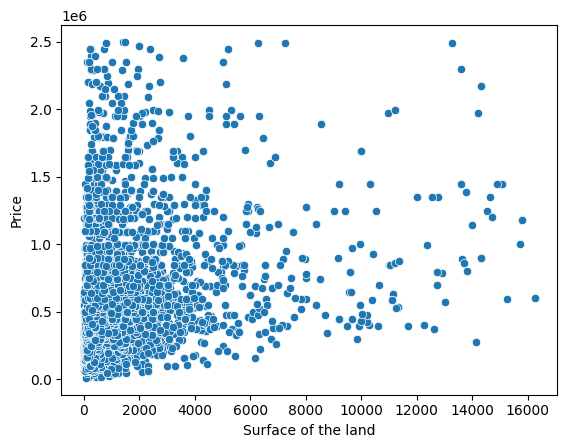

In [396]:
sns.scatterplot(x='Surface of the land', y="Price", data=house_df)
plt.show()

In [397]:
trans = MinMaxScaler()
d = trans.fit_transform(house_df)
house_df = pd.DataFrame(d, columns=house_df.columns)
print(house_df)

           Zip     Price  Living area  Number of rooms  Garden surface  \
0     0.085632  0.136145     0.052508         0.285714        0.009827   
1     0.800712  0.246988     0.053975         0.285714        0.026205   
2     0.344751  0.055823     0.030507         0.142857        0.001638   
3     0.478203  0.130522     0.061015         0.428571        0.045729   
4     0.021130  0.214859     0.074215         0.428571        0.000000   
...        ...       ...          ...              ...             ...   
8947  0.280249  0.149490     0.047521         0.285714        0.026599   
8948  0.280249  0.149592     0.047521         0.285714        0.026533   
8949  0.280249  0.150229     0.047521         0.285714        0.026533   
8950  0.837411  0.159036     0.053975         0.285714        0.000000   
8951  0.997665  0.168072     0.073042         0.285714        0.027516   

      Terrace surface  Open fire  Surface of the land  Number of facades  \
0            0.142857        0.0   

In [398]:
house_df = house_df[house_df['Price']<=0.6]

In [399]:
y = house_df[['Price']]
X = house_df[[
       'Building Cond. values',
       'Number of facades',
       'Number of rooms',
       'Living area',
       'Kitchen values',
       'Surface of the land',
       'Terrace surface',
       # 'Garden surface',
       'Open fire',
       'Swimming pool',
       'Primary energy consumption'
       ]]

In [400]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7) 

In [401]:
# min_max_scaler = MinMaxScaler()
# X_train_minmax = min_max_scaler.fit_transform(X_train)
# X_train_minmax

# d = preprocessing.normalize(X_train)
# scaled_df = pd.DataFrame(d, columns=X_train.columns)
# print(scaled_df)

# scaler = preprocessing.MinMaxScaler()
# d = scaler.fit_transform(X_train)
# scaled_df = pd.DataFrame(d, columns=X_train.columns)
# print(scaled_df)

# trans = MinMaxScaler()
# X_train = trans.fit_transform(X_train)

In [408]:
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()

reg = lr.fit(X_train, y_train)

y_predicted = lr.predict(X_test)

rmse = mean_squared_error(y_test, y_predicted)
print("rmse: ",rmse)

r2 = r2_score(y_test, y_predicted)
print("r2: ",r2)

score = reg.score(X, y)
print("score: ", score)

score2 = lr.score(X_test, y_test)
print("score2: ", score2)

rmse:  0.0054883672508685925
r2:  0.5080849369642129
score:  0.4774399962190077
score2:  0.5080849369642129


In [403]:
coeff_df = pd.DataFrame(lr.coef_.T,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Building Cond. values,0.056577
Number of facades,0.033569
Number of rooms,0.112844
Living area,1.106606
Kitchen values,0.041709
Surface of the land,0.181608
Terrace surface,-0.006231
Open fire,0.227385
Swimming pool,0.041452
Primary energy consumption,-0.054888


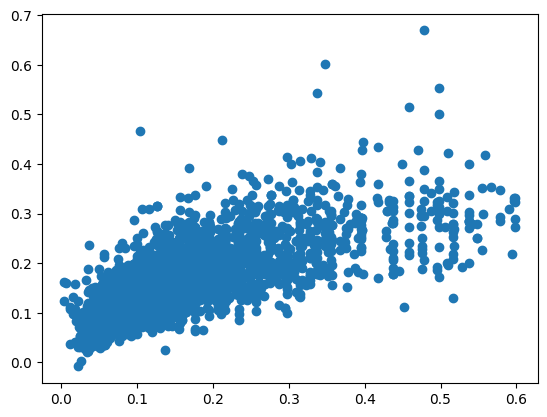

In [404]:
plt.scatter(y_test,y_predicted)

<Axes: xlabel='Price'>

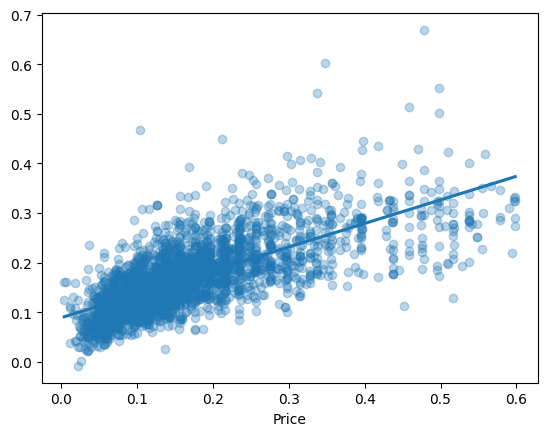

In [405]:
sns.regplot(x=y_test,y=y_predicted,ci=None,scatter_kws={'alpha': 0.3})

/var/folders/lh/rbpzcs3522qg45v9lc_xvgyc0000gn/T/ipykernel_49648/1061164399.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


<Axes: ylabel='Density'>

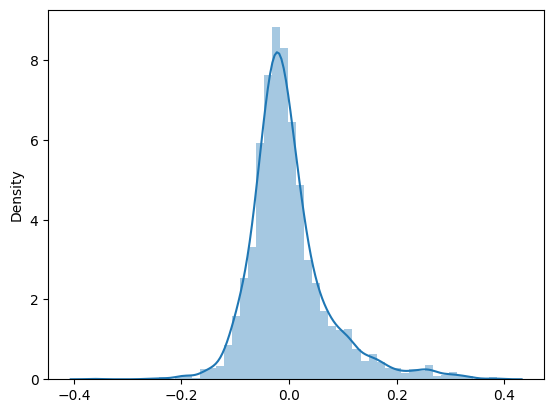

In [406]:
sns.distplot((y_test-predictions),bins=50)

In [407]:
house_df.skew()

Zip                           0.175357
Price                         1.473246
Living area                   5.264345
Number of rooms               0.821073
Garden surface                8.732888
Terrace surface               2.362825
Open fire                     6.650667
Surface of the land           5.345016
Number of facades             0.153676
Swimming pool                 5.179667
Building Cond. values        -0.523366
Kitchen values                0.553209
Primary energy consumption    0.764483
Energy efficiency            -0.255693
dtype: float64